In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import os
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as ticker

from Plot_Helper import *

path = './Data/Raw Data/'

# Read in Data

In [2]:
csv_data_list = []
file_name = []

# 遍历文件夹中的所有文件
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        file_name.append(filename)
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path, header = [0])
        date_name = df.columns[0]
        date_col = df.pop(date_name)
        date_col = pd.to_datetime(date_col)
        df.index = date_col
        csv_data_list.append(df)

for i in file_name:
    print(i)

# column_names = {}
# for i in range(len(csv_data_list)):
#     name = file_name[i]
#     ticker = csv_data_list[i].columns[1]
#     column_names[ticker] = name

yield_col = ['USGG1M', 'USGG3M', 'USGG6M', 'USGG12M', 'USGG2YR', 'USGG3YR', 'USGG5YR', 'USGG7YR', 'USGG10YR', 'USGG20YR', 'USGG30YR']
other_col = ['Core CPI Growth', 'CPI Growth', 'Real GDP', 'Real Potential GDP', 'US FFR', 'US GDP Growth']

Core CPI Growth.csv
CPI Growth.csv
Real GDP.csv
Real Potential GDP.csv
US FFR.csv
US GDP Growth.csv
USGG10YR.csv
USGG12M.csv
USGG1M.csv
USGG20YR.csv
USGG2YR.csv
USGG30YR.csv
USGG3M.csv
USGG3YR.csv
USGG5YR.csv
USGG6M.csv
USGG7YR.csv


In [3]:
def visualization_1(index):
    name = file_name[index][:-4]
    print(name)

    data = csv_data_list[index]

    # Check whether there exists NAN value inside the dataframe
    print(df.isnull().any().any())

    plt.figure(figsize = (12, 8))
    plt.plot(data.index, data.iloc[:, 0], label = name, color = 'blue', alpha = 0.8)
    plt.legend()
    plt.xlabel('Date')
    plt.title(name)
    plt.grid()
    plt.show()

Core CPI Growth
False


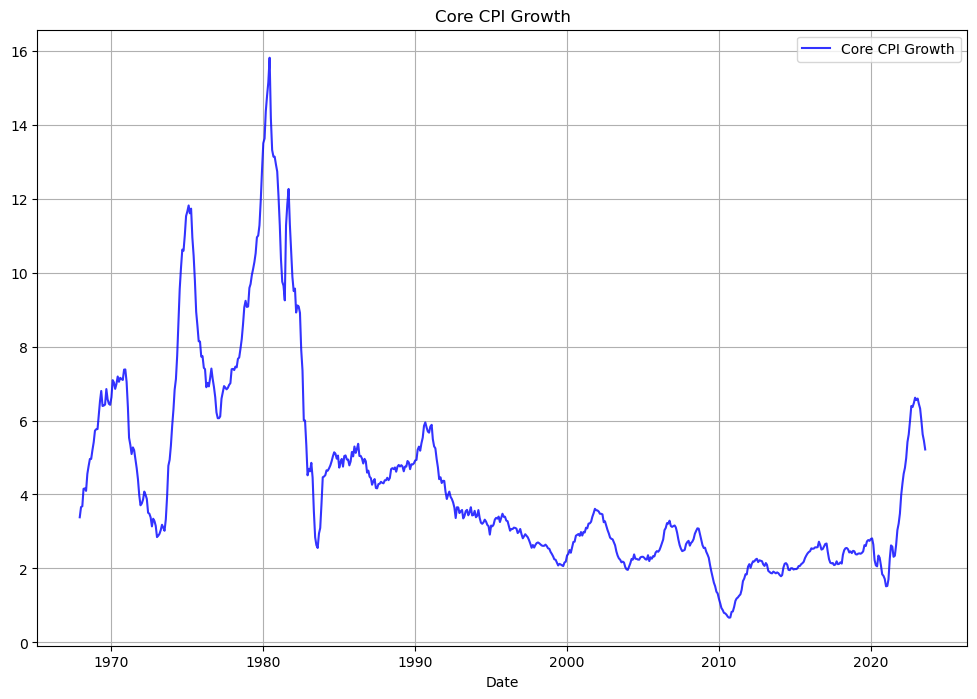

CPI Growth
False


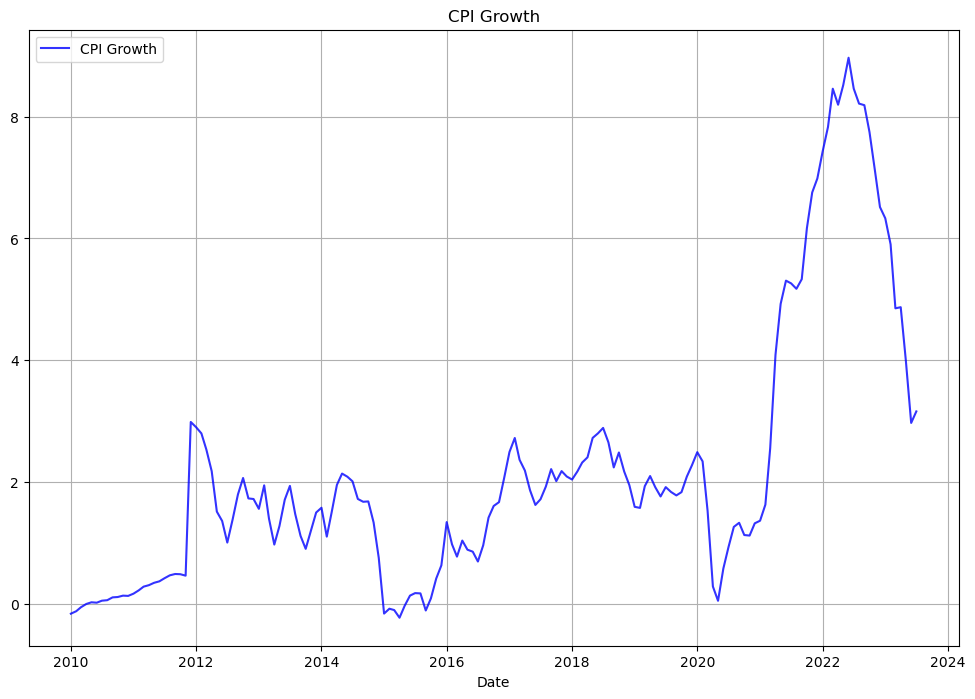

Real GDP
False


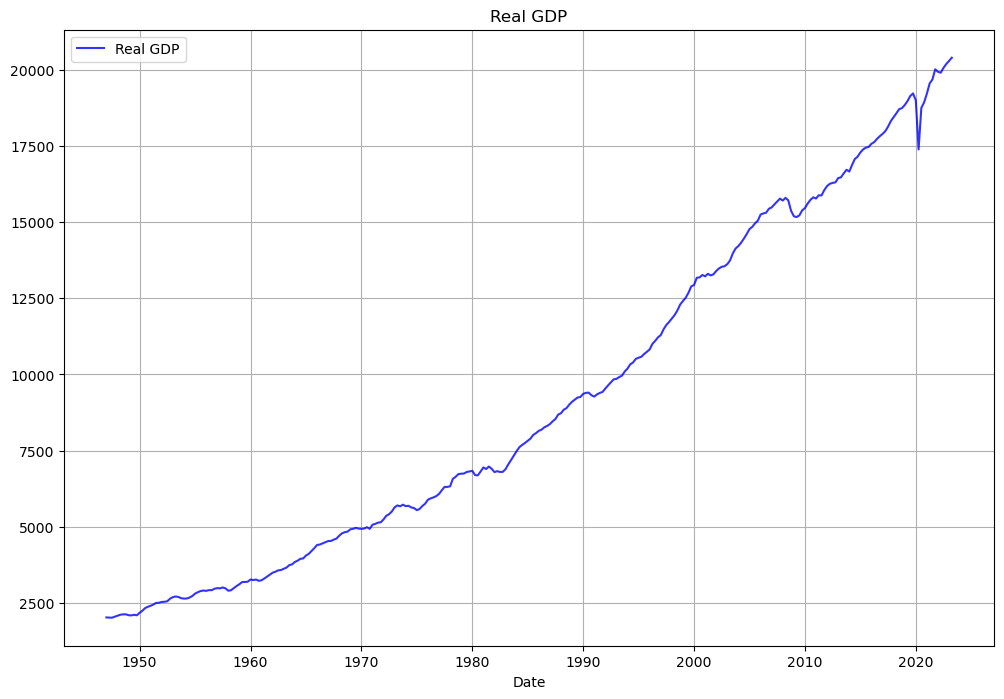

Real Potential GDP
False


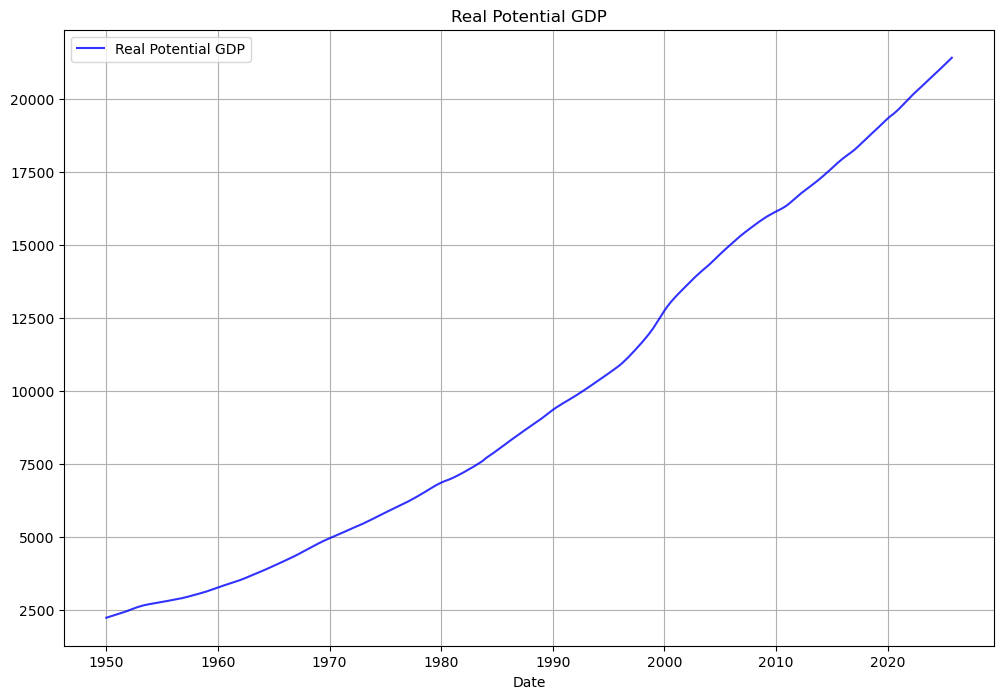

US FFR
False


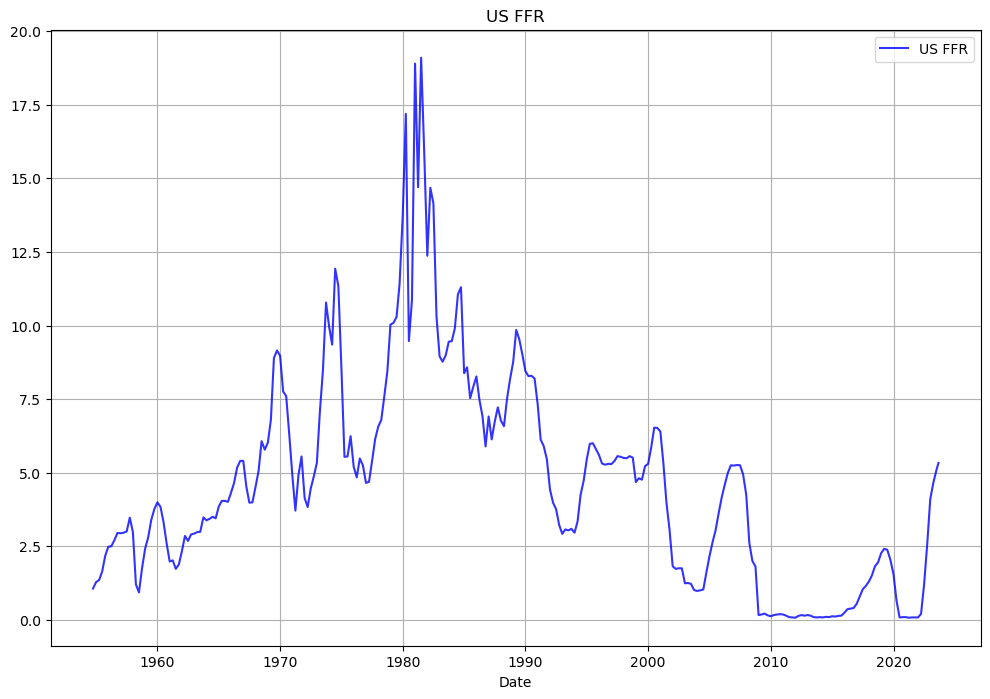

US GDP Growth
False


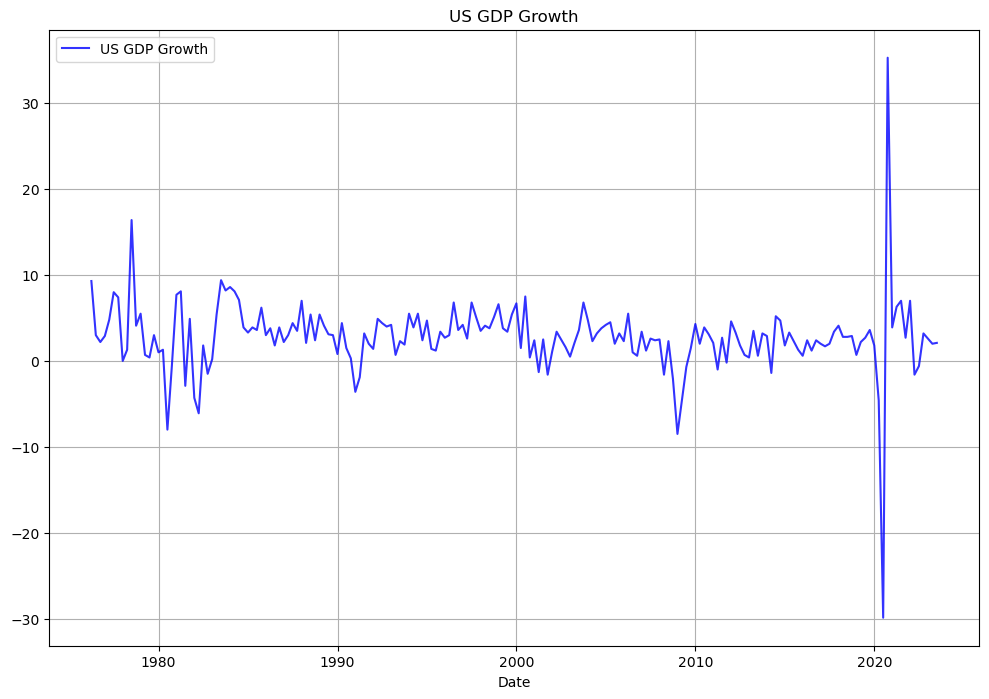

USGG10YR
False


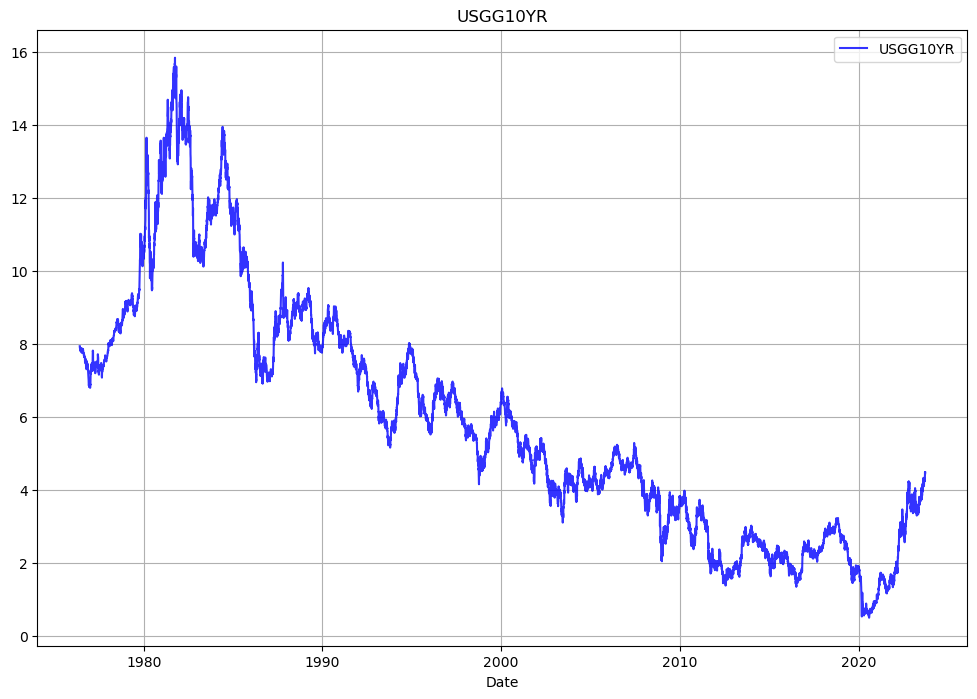

USGG12M
False


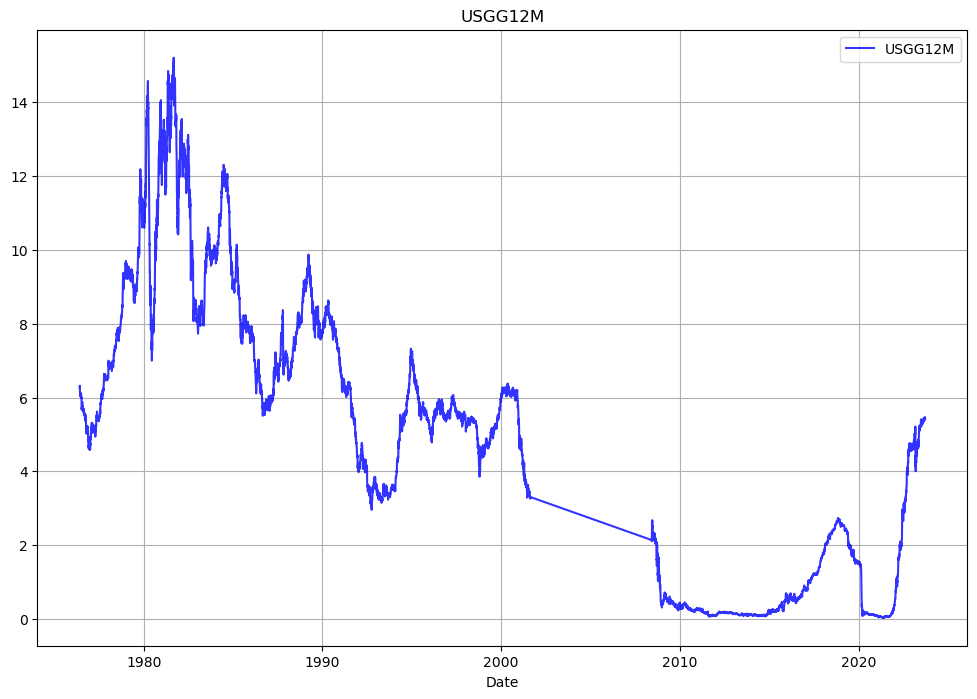

USGG1M
False


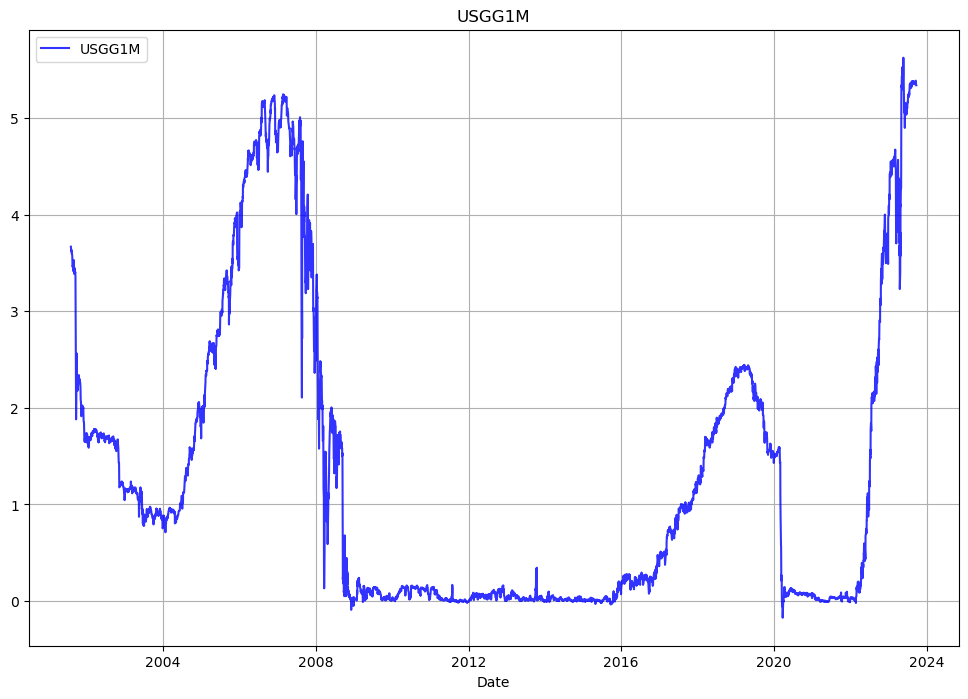

USGG20YR
False


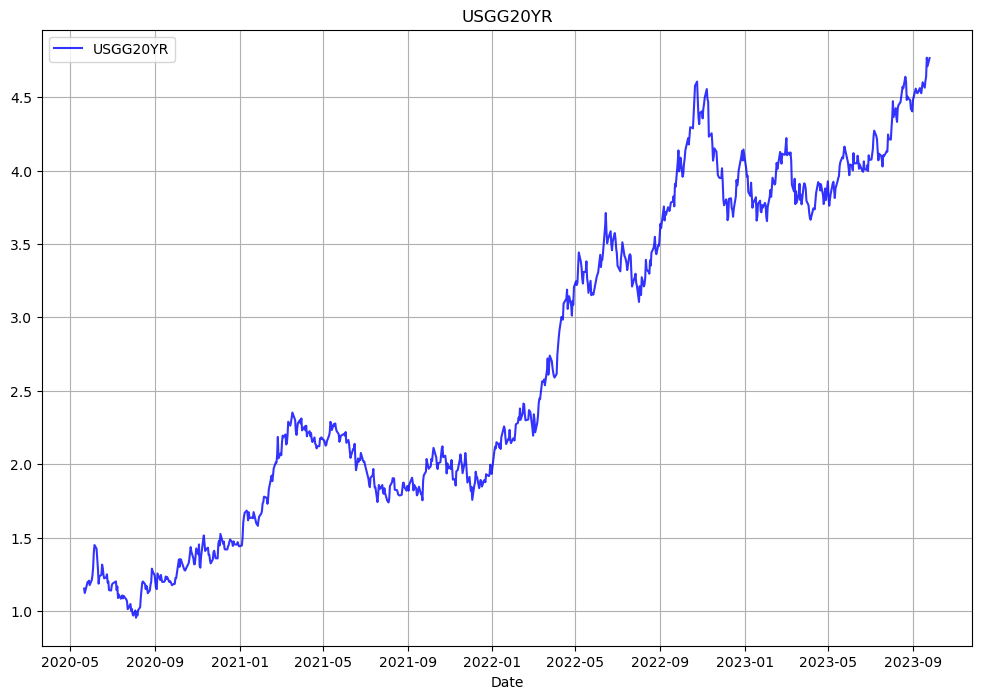

USGG2YR
False


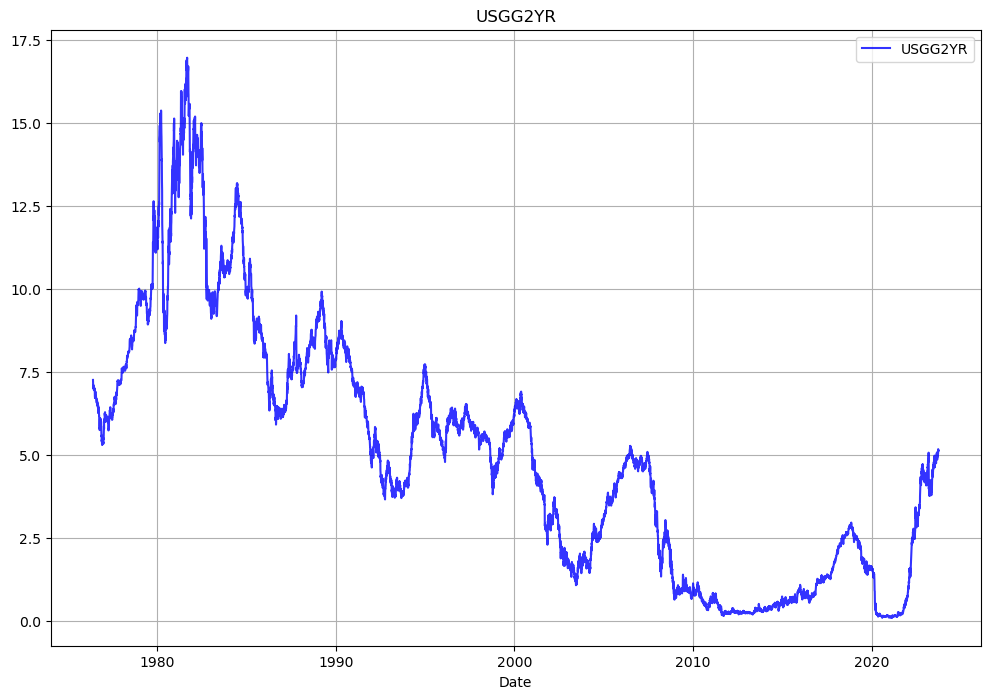

USGG30YR
False


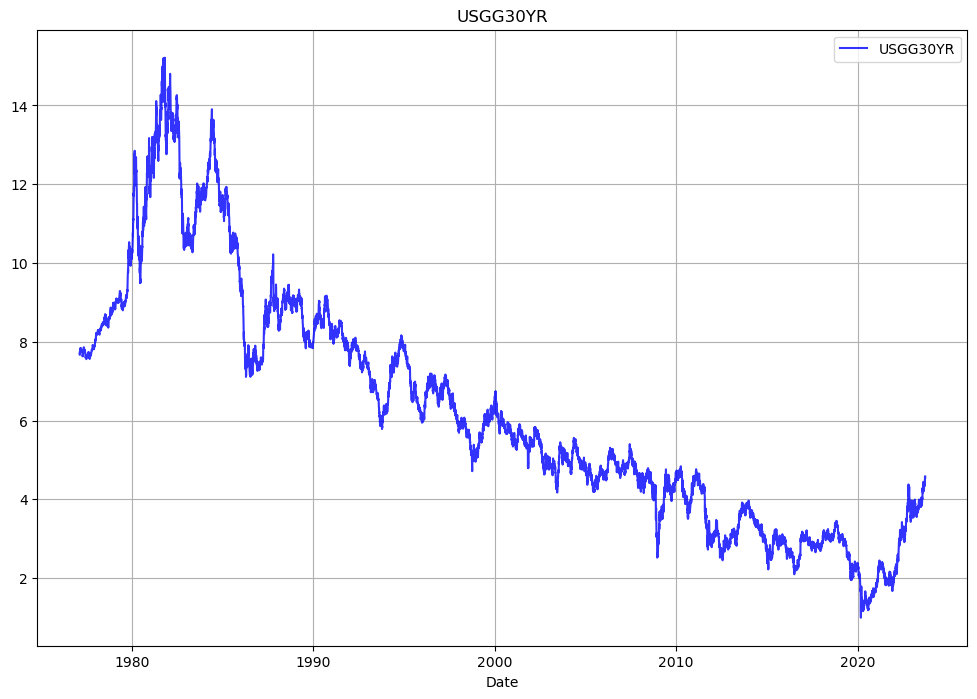

USGG3M
False


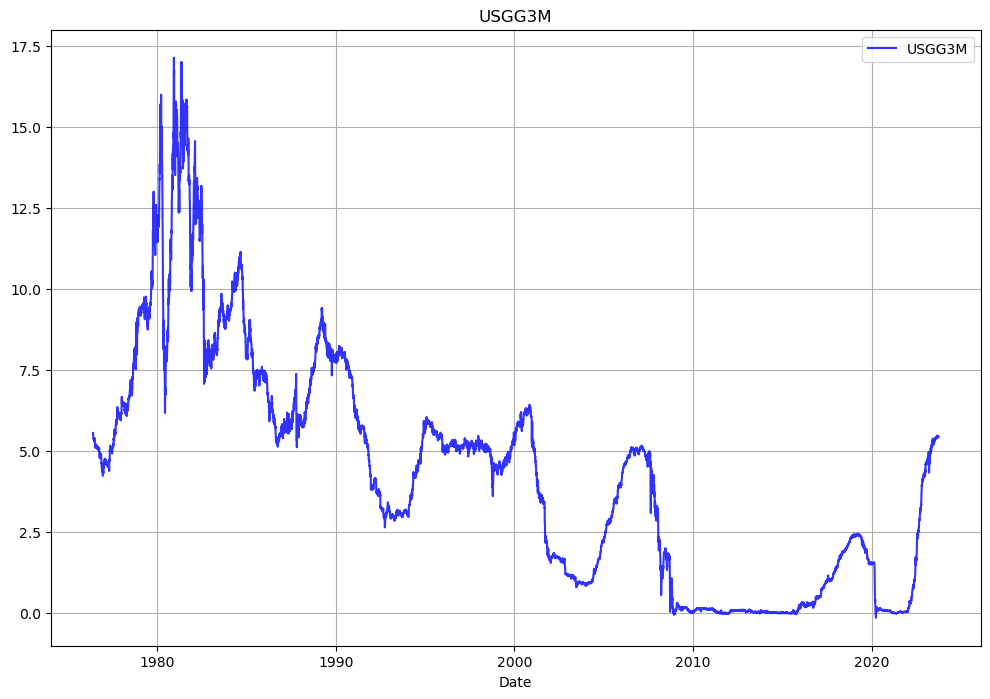

USGG3YR
False


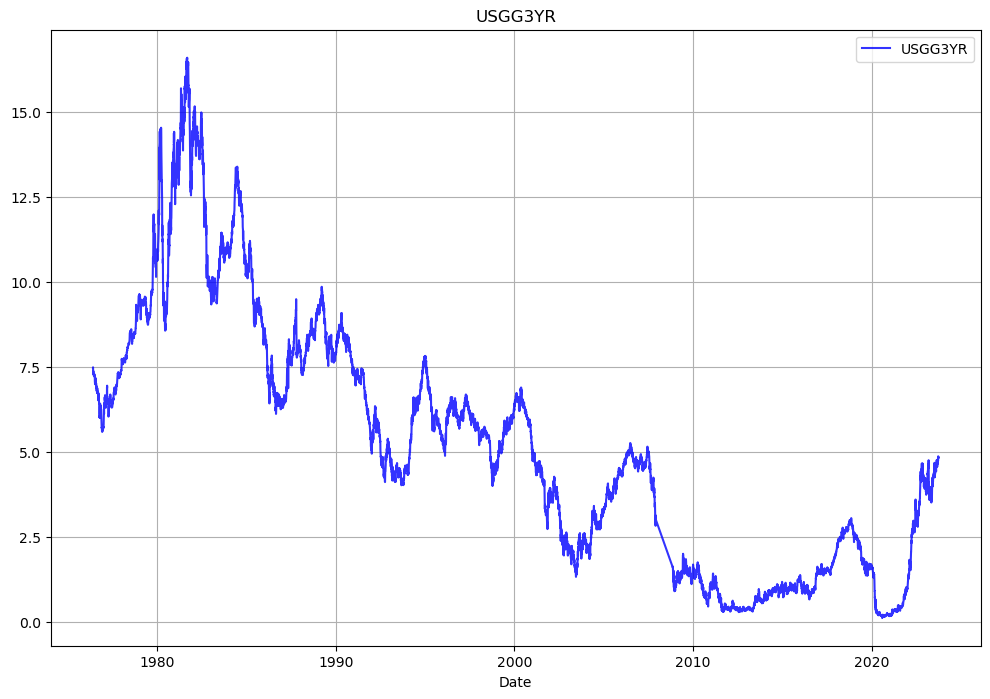

USGG5YR
False


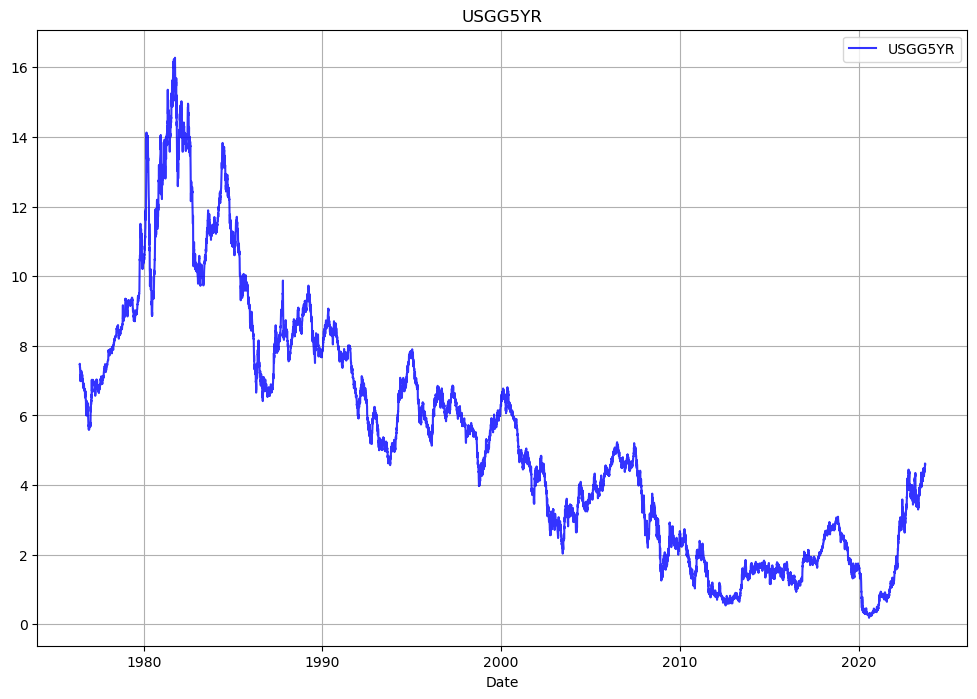

USGG6M
False


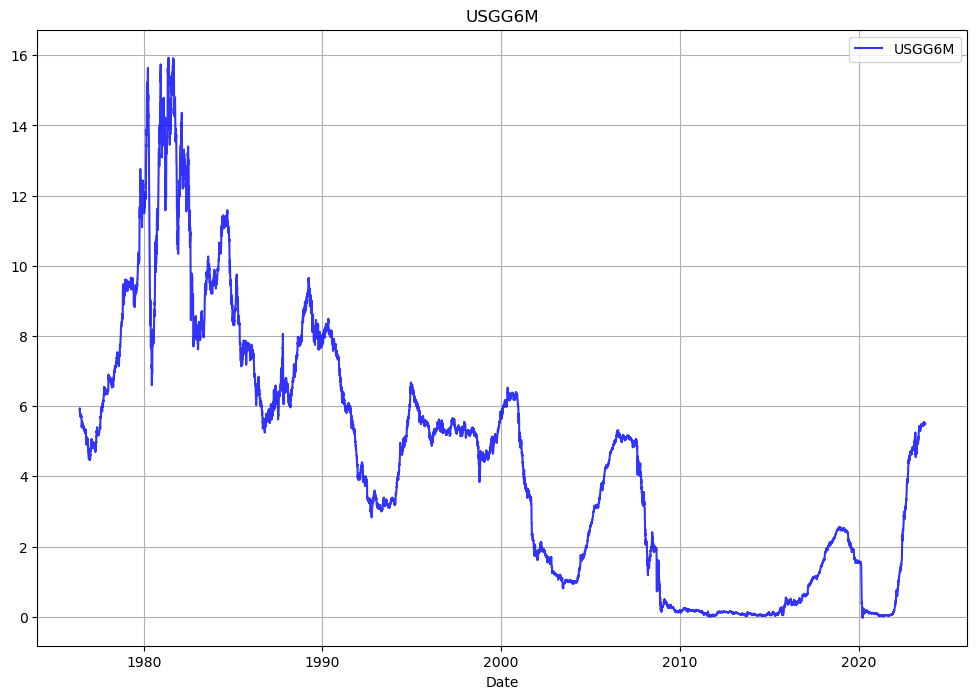

USGG7YR
False


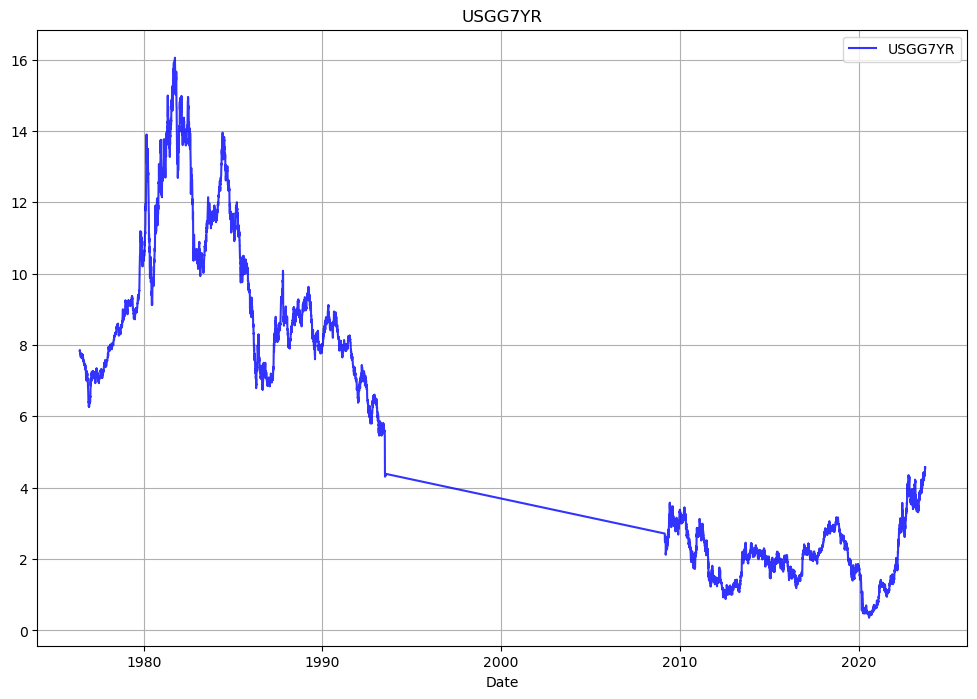

In [4]:
for i in range(len(file_name)):
    visualization_1(i)

# Yield Data Manipulation

In [5]:
yield_df = pd.DataFrame()
for i in yield_col:
    checker = i + '.csv'
    idx = file_name.index(checker)
    print(idx)
    col = csv_data_list[idx]
    yield_df = pd.merge(yield_df, col, how = 'outer', 
                        left_index = True, right_index = True)

yield_df.columns = yield_col

8
12
15
7
10
13
14
16
6
9
11


C:\Users\asus\AppData\Local\Temp\ipykernel_48476\1916280475.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Last Price_x'} in the result is deprecated and will raise a MergeError in a future version.
  yield_df = pd.merge(yield_df, col, how = 'outer',
C:\Users\asus\AppData\Local\Temp\ipykernel_48476\1916280475.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Last Price_x'} in the result is deprecated and will raise a MergeError in a future version.
  yield_df = pd.merge(yield_df, col, how = 'outer',
C:\Users\asus\AppData\Local\Temp\ipykernel_48476\1916280475.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Last Price_x'} in the result is deprecated and will raise a MergeError in a future version.
  yield_df = pd.merge(yield_df, col, how = 'outer',
C:\Users\asus\AppData\Local\Temp\ipykernel_48476\1916280475.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Last Price_x'} in the result is deprecat

In [6]:
# Example of interactive plot

# source = ColumnDataSource(data={'DATE': csv_data_list.index, 'Value': csv_data_list[]})

# p = figure(plot_height=400, plot_width=600, title='Yield Curve')
# p.line(x='Maturity', y='Yield', source=source, line_width=2)

# hover = HoverTool()
# hover.tooltips = [('Maturity', '@Maturity years'), ('Yield', '@Yield')]
# p.add_tools(hover)

# output_notebook()
# show(p)

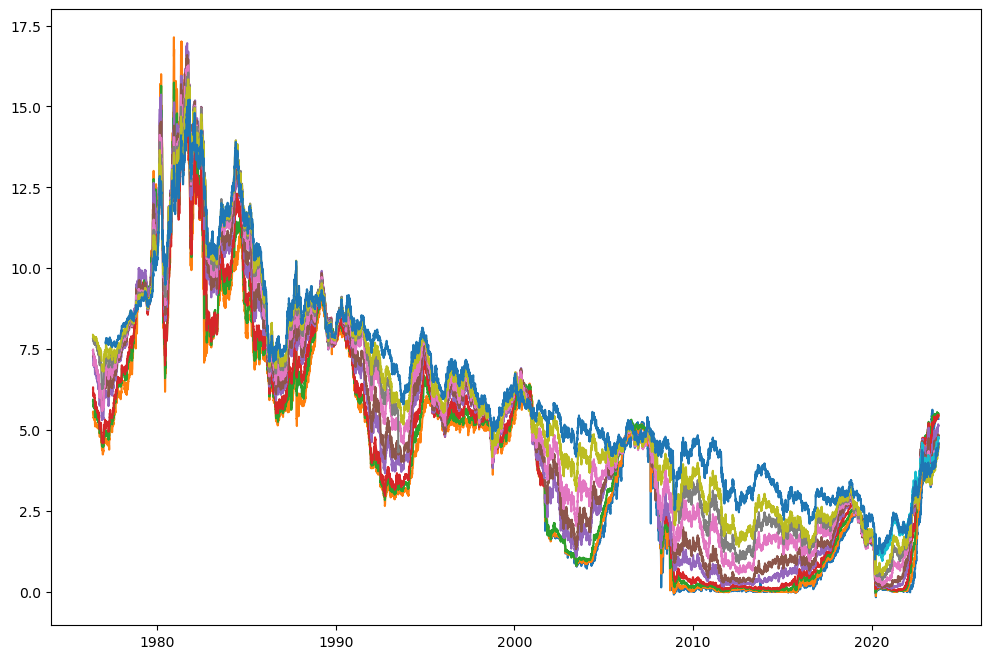

In [7]:
plt.figure(figsize = (12, 8))
plt.plot(yield_df)
plt.show()

In [8]:
yield_df = yield_df.drop(['USGG1M', 'USGG12M', 'USGG7YR', 'USGG3YR', 'USGG20YR'], axis = 1)
start_time = pd.to_datetime('1990-01-01')
yield_df = yield_df[start_time:]
yield_df = yield_df.dropna(how = 'all')
yield_df = yield_df.fillna(method = 'ffill')

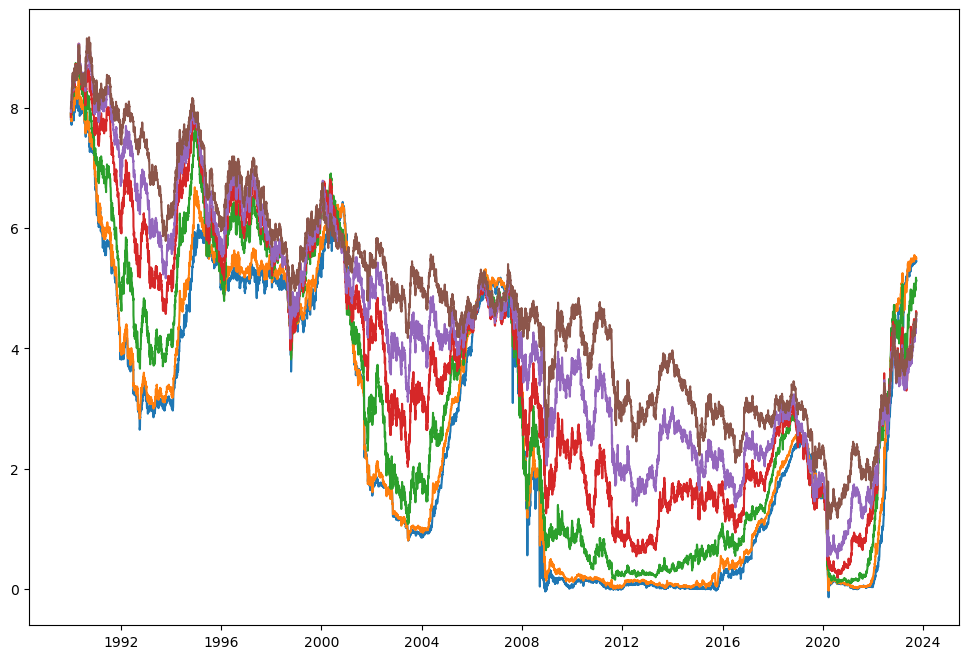

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(yield_df)
plt.show()

In [10]:
# yield_df.isna().any().any()
fig = px.line(yield_df)
fig.update_yaxes(title_text='Yield Value')

fig.show()
pio.write_html(fig, './Images/plotly_interactive_figure.html')

6


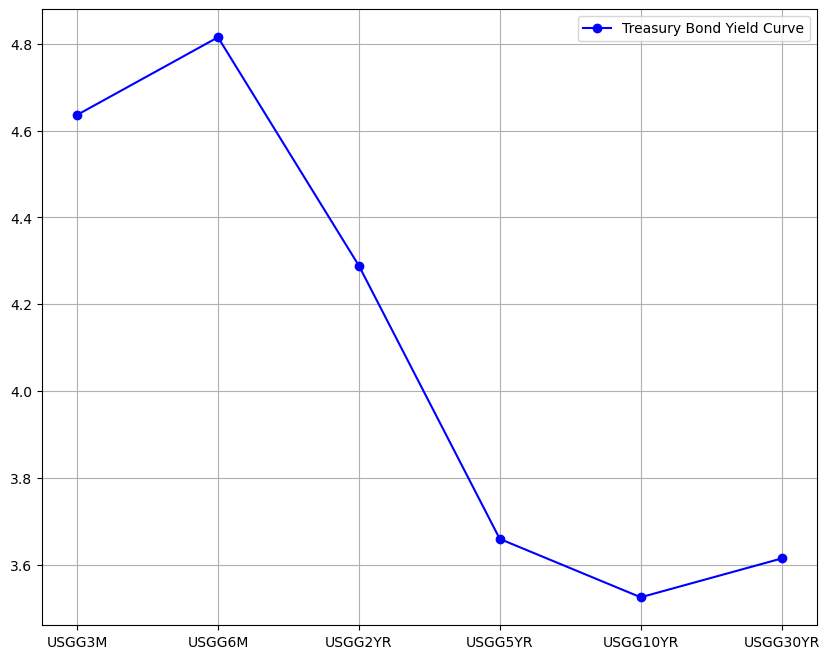

In [11]:
yield_curve_plot(yield_df, pd.to_datetime('2023-02-03'))

In [12]:
yield_df.to_csv('./Data/Processed/yield_data.csv')

# Macro Data Manipulation

In [13]:
macro_df = pd.DataFrame()
for i in other_col:
    checker = i + '.csv'
    idx = file_name.index(checker)
    print(idx)
    col = csv_data_list[idx]
    macro_df = pd.merge(macro_df, col, how = 'outer', 
                        left_index = True, right_index = True)

macro_df.columns = other_col
macro_df = macro_df[start_time:]

0
1
2
3
4
5


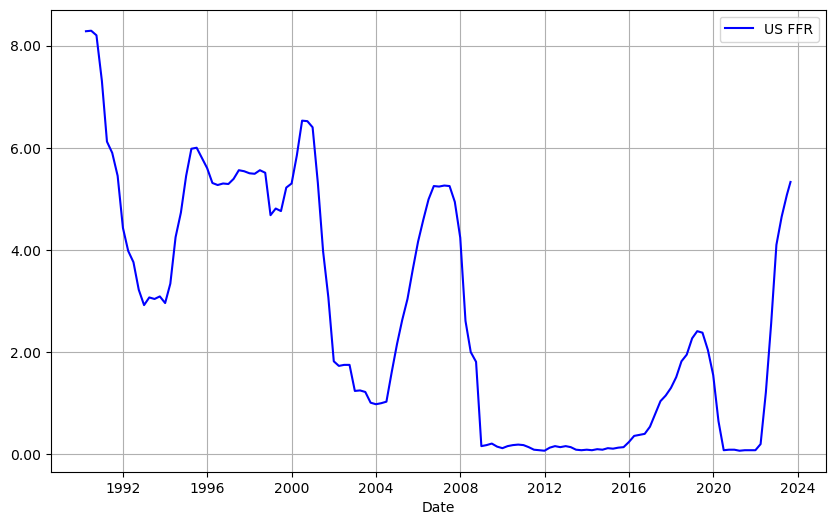

In [25]:
plt.figure(figsize = (10, 6))

plt.plot(macro_df['US FFR'].dropna(), color = 'blue', label = 'US FFR')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.legend()

plt.xlabel('Date')
plt.grid()

plt.show()

In [29]:
data = macro_df[['US FFR']].dropna()

fig = px.line(data, x=data.index, y='US FFR', title='US FFR', labels={'Date': 'Date', 'US FFR': 'US FFR'})
fig.update_layout(colorway=px.colors.qualitative.Plotly)

fig.update_yaxes(tickformat=".2f")
fig.update_xaxes(title_text="Date")
fig.show()